In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xbpch
import cartopy.crs as ccrs
from matplotlib import colorbar, colors
import statistics
from sklearn.metrics import r2_score
%matplotlib inline
# Name the xbpch files for the reference and new models
OLD = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.bpch'
NEW = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.new.bpch'



# Upload/open the data from the models 
OLD_ds = (xbpch.open_bpchdataset(OLD))
NEW_ds = (xbpch.open_bpchdataset(NEW))
Dataset_OLD=OLD_ds
Dataset_NEW= NEW_ds

/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brittany/anaconda3/envs/geoschem/lib/python3.6/site-packages/pandas/io/parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [2]:
def LatitudinalGraphs(Dataset_OLD, Dataset_NEW):
    # Import the observed data from the sites     
    Hgobs = pd.read_csv('~/Documents/HG/data/TGMSiteMonthly.csv',  skiprows=[0], na_values=(-9999))
    Hgobs.columns=['SiteID', 'Lat', 'Lon','Month', 'Year', 'Concentration', 'Standard deviation']
   # Site= Hgobs.SiteID
    
    # Arrange the data by order of latitude and ensure when graphs are plotted the data is sequential
    #Graph_order=Hgobs.sort_values(by=['Lat'], ascending=0)
    #HgobsOrder=Graph_order.sort_values(by=['Month'])

    # Make a variable for the unit conversion factor to obtain ng/m^3
    Unit_Conversion= 8.93
    Arctic=np.array(['ALT', 'VRS', 'ZEP', 'AND', 'PAL'])
    SouthMidLat=np.array(['CPT', 'AMS', 'BAR'])
    Antarctic= np.array(['TRO', 'DDU', 'DMC'])
    NorthMidLat= np.array(['MHD', 'UDH', 'KEJ', 'EBG', 'HTW', 'PNY', 'ATN', 'YKV', 'GRB'])
    
    # Create numpy zeros for the amount of items in each list.
    Arc_ds=np.zeros(len(Arctic))
    SML_ds=np.zeros(len(SouthMidLat))
    Ant_ds=np.zeros(len(Antarctic))
    NML_ds= np.zeros(len(NorthMidLat))


    # Select the list of numpy zeros and extract the data from each site. 
    for i in range (len(Arctic)):
        #Arc_ds=np.zeros(len(Arctic))

        Arc_ds= Hgobs[Hgobs.SiteID==Arctic[i]].reset_index()
   
        if i==0:

            All_Arctic_ds = Arc_ds

        else:

            All_Arctic_ds = pd.concat([All_Arctic_ds,Arc_ds])

    # Calculate the mean and stanadard deviation for each month.
    Arc_graph = All_Arctic_ds.groupby('Month').mean()
    Arc_graph_SD = All_Arctic_ds.groupby('Month').std() 
    #print (Arc_graph_SD)




    for i in range (len(SouthMidLat)):
        SML_ds= Hgobs[Hgobs.SiteID==SouthMidLat[i]].reset_index()
        if i==0:

            All_SML_ds = SML_ds

        else:

            All_SML_ds = pd.concat([All_SML_ds,SML_ds])
        
    # Calculate the mean and stanadard deviation for each month.        
    SML_graph = All_SML_ds.groupby('Month').mean()
    SML_graph_SD = All_SML_ds.groupby('Month').std()
      
      #  print (SML_ds)
    for i in range (len(Antarctic)):
        Ant_ds= Hgobs[Hgobs.SiteID==Antarctic[i]].reset_index()
        if i==0:

            All_Ant_ds = Ant_ds

        else:

            All_Ant_ds = pd.concat([All_Ant_ds,Ant_ds])    
    
    # Calculate the mean and stanadard deviation for each month.        
    Ant_graph = All_Ant_ds.groupby('Month').mean()
    Ant_graph_SD = All_Ant_ds.groupby('Month').std()
    #    print (Ant_ds)

    for i in range (len(NorthMidLat)):
        NML_ds= Hgobs[Hgobs.SiteID==NorthMidLat[i]].reset_index()
        if i==0:

            All_NML_ds = NML_ds

        else:

            All_NML_ds = pd.concat([All_NML_ds,NML_ds])
       # print (NML_ds)
    
    # Calculate the mean and stanadard deviation for each month.        
    NML_graph = All_NML_ds.groupby('Month').mean()
    NML_graph_SD = All_NML_ds.groupby('Month').std()
    
    
    
    
        # Create a dictionary for the levels of the model who's surfaces are not at 0
    def levels(SiteID):
        level = {
        'ZEP': 3,
        'AND': 2,
        'MWA': 1,
        'MLO': 18,
        'MBO': 16,
        'NamCo': 18,
        'LLN':16,
            }
        return level.get(SiteID.upper(), 0)
        
        
        # Extract and add together Hg0 and Hg2 at the surface from the reference model multiplying by the unit converion factor 
        # to obtain values for Total Gaseous Mercury.
   # OLD_Hg0 =((Dataset_OLD['IJ_AVG_S_Hg0'].isel(lev=levels(SiteID))) * Unit_Conversion)                              
  #  OLD_Hg2 =((Dataset_OLD['IJ_AVG_S_Hg2'].isel(lev=levels(SiteID))) * Unit_Conversion)                
  #  TGM_Old = (OLD_Hg0 + OLD_Hg2)




   # Extract and add together Hg0 and Hg2 at the surface from the new model multiplying by the unit converion factor 
        # to obtain values for Total Gaseous Mercury.
  #  NEW_Hg0 =((Dataset_NEW['IJ_AVG_S_Hg0'].isel(lev=levels(SiteID)) * Unit_Conversion))                         
   # NEW_Hg2 =((Dataset_NEW['IJ_AVG_S_Hg2'].isel(lev=levels(SiteID)) * Unit_Conversion))
  #  TGM_New =( NEW_Hg0 + NEW_Hg2)
    
    
        # Specify the first latitude and longitude of the Site ID 
   # Lat=Dataset.Lat[0]
  #  Lon=Dataset.Lon[0]
   #     

        # Specify the latitude and longitude where data should be extracted from for both reference and new models.
    #OLD_mod= (TGM_Old.sel(lat=Lat, lon=Lon,  method='nearest'))
   # NEW_mod= (TGM_New.sel(lat=Lat, lon=Lon,  method='nearest'))   
        


        
    # Plot the four graphs as subplots.
    plt.figure(figsize=(20,10))
    
    
    
    Arc_ds.index=pd.to_datetime(Arc_ds.Month, format='%m')
    # Plot the reference model and use a geographical map.
    ax= plt.subplot(221)
    plt.errorbar(Arc_ds.Month, Arc_graph.Concentration,yerr=Arc_graph_SD.Concentration, color='k')
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    #plt.legend([ 'Reference Model','New Model', 'Observations'])
    # Add a title.
    plt.title("Arctic")
    # Set ticks to every month 
    ax.set_xticks(Arc_ds.Month)
    # Set tick labels to month names
    ax.set_xticklabels(Arc_ds.index.strftime('%b'))
    
    

    Ant_ds.index=pd.to_datetime(Ant_ds.Month, format='%m')    
    # Plot the reference model and use a geographical map.
    ax= plt.subplot(222)
    plt.errorbar(Ant_ds.Month, Ant_graph.Concentration,yerr=Ant_graph_SD.Concentration, color='k')
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    #plt.legend([ 'Reference Model','New Model', 'Observations'])
    # Add a title.
    plt.title("Antarctic")
    # Set ticks to every month 
    ax.set_xticks(Ant_ds.Month)    
    # Set tick labels to month names
    ax.set_xticklabels(Ant_ds.index.strftime('%b'))
    
    
    
 
    NML_ds.index=pd.to_datetime(NML_ds.Month, format='%m')
    # Plot the reference model and use a geographical map.
    ax= plt.subplot(223)
    plt.errorbar(NML_ds.Month, NML_graph.Concentration,yerr=NML_graph_SD.Concentration, color='k')
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    #plt.legend([ 'Reference Model','New Model', 'Observations'])
    # Add a title.
    plt.title("Northern Mid Latitudes")
    # Set ticks to every month 
    ax.set_xticks(NML_ds.Month)
    # Set tick labels to month names
    ax.set_xticklabels(NML_ds.index.strftime('%b'))
    
    
    
    SML_ds.index=pd.to_datetime(SML_ds.Month, format='%m')
    # Plot the reference model and use a geographical map.
    ax= plt.subplot(224)
    plt.errorbar(SML_ds.Month, SML_graph.Concentration,yerr=SML_graph_SD.Concentration, color='k')
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    #plt.legend([ 'Reference Model','New Model', 'Observations'])
    # Add a title.
    plt.title("Southern Mid Latitudes")
    # Set ticks to every month 
    ax.set_xticks(SML_ds.Month)    
    # Set tick labels to month names
    ax.set_xticklabels(SML_ds.index.strftime('%b'))
  

    
    
     # Show the 4 subplots 
    LatGraph= plt.show()
    return LatGraph

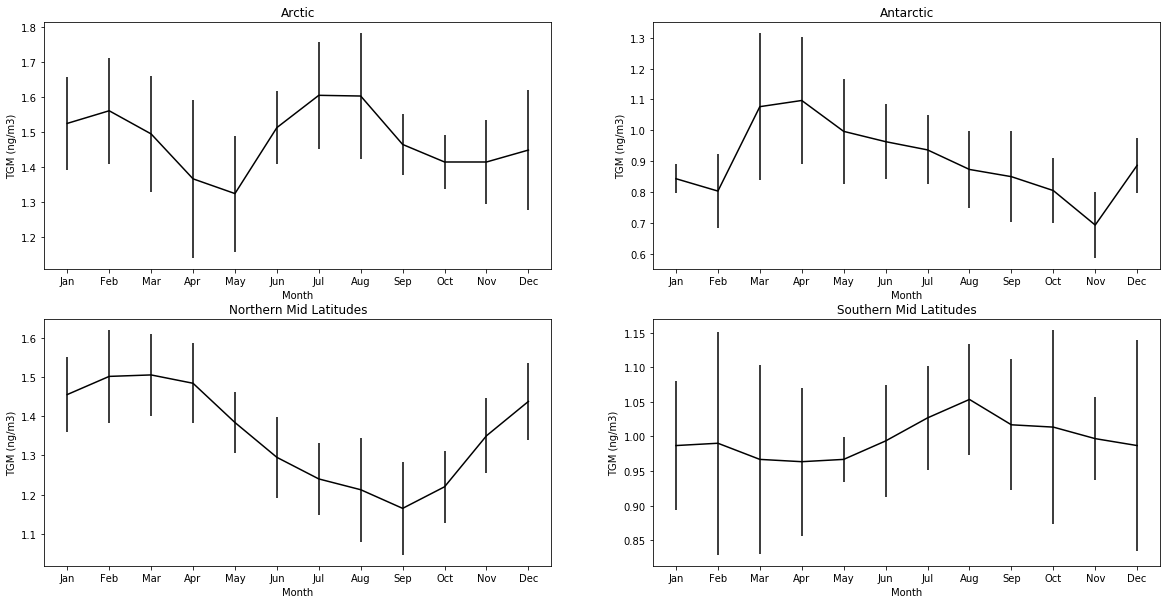

In [3]:
LatitudinalGraphs(OLD_ds, NEW_ds)

In [4]:
def LatitudinalGraphs(Dataset_OLD, Dataset_NEW):
    # Import the observed data from the sites     
    Hgobs = pd.read_csv('~/Documents/HG/data/TGMSiteMonthly.csv',  skiprows=[0], na_values=(-9999))
    Hgobs.columns=['SiteID', 'Lat', 'Lon','Month', 'Year', 'Concentration', 'Standard deviation']
   # Site= Hgobs.SiteID
    
    # Arrange the data by order of latitude and ensure when graphs are plotted the data is sequential
    #Graph_order=Hgobs.sort_values(by=['Lat'], ascending=0)
    #HgobsOrder=Graph_order.sort_values(by=['Month'])

    # Make a variable for the unit conversion factor to obtain ng/m^3
    Unit_Conversion= 8.93
    Arctic=np.array(['ALT', 'VRS', 'ZEP', 'AND', 'PAL'])
    SouthMidLat=np.array(['CPT', 'AMS', 'BAR'])
    Antarctic= np.array(['TRO', 'DDU', 'DMC'])
    NorthMidLat= np.array(['MHD', 'UDH', 'KEJ', 'EBG', 'HTW', 'PNY', 'ATN', 'YKV', 'GRB'])
    
    # Create numpy zeros for the amount of items in each list.
    Arc_ds=np.zeros(len(Arctic))
    SML_ds=np.zeros(len(SouthMidLat))
    Ant_ds=np.zeros(len(Antarctic))
    NML_ds= np.zeros(len(NorthMidLat))


    # Select the list of numpy zeros and extract the data from each site. 
    for i in range (len(Arctic)):
        #Arc_ds=np.zeros(len(Arctic))

        Arc_ds= Hgobs[Hgobs.SiteID==Arctic[i]].reset_index()
   
        if i==0:

            All_Arctic_ds = Arc_ds

        else:

            All_Arctic_ds = pd.concat([All_Arctic_ds,Arc_ds])

    # Calculate the mean and stanadard deviation for each month.
    Arc_graph = All_Arctic_ds.groupby('Month').mean()
    Arc_graph_SD = All_Arctic_ds.groupby('Month').std() 
    #print (Arc_graph_SD)




    for i in range (len(SouthMidLat)):
        SML_ds= Hgobs[Hgobs.SiteID==SouthMidLat[i]].reset_index()
        if i==0:

            All_SML_ds = SML_ds

        else:

            All_SML_ds = pd.concat([All_SML_ds,SML_ds])
        
    # Calculate the mean and stanadard deviation for each month.        
    SML_graph = All_SML_ds.groupby('Month').mean()
    SML_graph_SD = All_SML_ds.groupby('Month').std()
      
      #  print (SML_ds)
    for i in range (len(Antarctic)):
        Ant_ds= Hgobs[Hgobs.SiteID==Antarctic[i]].reset_index()
        if i==0:

            All_Ant_ds = Ant_ds

        else:

            All_Ant_ds = pd.concat([All_Ant_ds,Ant_ds])    
    
    # Calculate the mean and stanadard deviation for each month.        
    Ant_graph = All_Ant_ds.groupby('Month').mean()
    Ant_graph_SD = All_Ant_ds.groupby('Month').std()
    #    print (Ant_ds)

    for i in range (len(NorthMidLat)):
        NML_ds= Hgobs[Hgobs.SiteID==NorthMidLat[i]].reset_index()
        if i==0:

            All_NML_ds = NML_ds

        else:

            All_NML_ds = pd.concat([All_NML_ds,NML_ds])
       # print (NML_ds)
    
    # Calculate the mean and stanadard deviation for each month.        
    NML_graph = All_NML_ds.groupby('Month').mean()
    NML_graph_SD = All_NML_ds.groupby('Month').std()
    
    
    
    
        # Create a dictionary for the levels of the model who's surfaces are not at 0
    def levels(SiteID):
        level = {
        'ZEP': 3,
        'AND': 2,
        'MWA': 1,
        'MLO': 18,
        'MBO': 16,
        'NamCo': 18,
        'LLN':16,
            }
        return level.get(SiteID.upper(), 0)
        
        
        # Extract and add together Hg0 and Hg2 at the surface from the reference model multiplying by the unit converion factor 
        # to obtain values for Total Gaseous Mercury.
   # OLD_Hg0 =((Dataset_OLD['IJ_AVG_S_Hg0'].isel(lev=levels(SiteID))) * Unit_Conversion)                              
  #  OLD_Hg2 =((Dataset_OLD['IJ_AVG_S_Hg2'].isel(lev=levels(SiteID))) * Unit_Conversion)                
  #  TGM_Old = (OLD_Hg0 + OLD_Hg2)




   # Extract and add together Hg0 and Hg2 at the surface from the new model multiplying by the unit converion factor 
        # to obtain values for Total Gaseous Mercury.
  #  NEW_Hg0 =((Dataset_NEW['IJ_AVG_S_Hg0'].isel(lev=levels(SiteID)) * Unit_Conversion))                         
   # NEW_Hg2 =((Dataset_NEW['IJ_AVG_S_Hg2'].isel(lev=levels(SiteID)) * Unit_Conversion))
  #  TGM_New =( NEW_Hg0 + NEW_Hg2)
    
    
        # Specify the first latitude and longitude of the Site ID 
   # Lat=Dataset.Lat[0]
  #  Lon=Dataset.Lon[0]
   #     

        # Specify the latitude and longitude where data should be extracted from for both reference and new models.
    #OLD_mod= (TGM_Old.sel(lat=Lat, lon=Lon,  method='nearest'))
   # NEW_mod= (TGM_New.sel(lat=Lat, lon=Lon,  method='nearest'))   
        


        
    # Plot the four graphs as subplots.
    plt.figure(figsize=(20,10))
    
    
    
    Arc_ds.index=pd.to_datetime(Arc_ds.Month, format='%m')
    # Plot the reference model and use a geographical map.
    ax= plt.subplot(221)
    plt.errorbar(Arc_ds.Month, Arc_graph.Concentration,yerr=Arc_graph_SD.Concentration, color='k')
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    #plt.legend([ 'Reference Model','New Model', 'Observations'])
    # Add a title.
    plt.title("Arctic")
    # Set ticks to every month 
    ax.set_xticks(Arc_ds.Month)
    # Set tick labels to month names
    ax.set_xticklabels(Arc_ds.index.strftime('%b'))
    
    

    Ant_ds.index=pd.to_datetime(Ant_ds.Month, format='%m')    
    # Plot the reference model and use a geographical map.
    ax= plt.subplot(222)
    plt.errorbar(Ant_ds.Month, Ant_graph.Concentration,yerr=Ant_graph_SD.Concentration, color='k')
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    #plt.legend([ 'Reference Model','New Model', 'Observations'])
    # Add a title.
    plt.title("Antarctic")
    # Set ticks to every month 
    ax.set_xticks(Ant_ds.Month)    
    # Set tick labels to month names
    ax.set_xticklabels(Ant_ds.index.strftime('%b'))
    
    
    
 
    NML_ds.index=pd.to_datetime(NML_ds.Month, format='%m')
    # Plot the reference model and use a geographical map.
    ax= plt.subplot(223)
    plt.errorbar(NML_ds.Month, NML_graph.Concentration,yerr=NML_graph_SD.Concentration, color='k')
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    #plt.legend([ 'Reference Model','New Model', 'Observations'])
    # Add a title.
    plt.title("Northern Mid Latitudes")
    # Set ticks to every month 
    ax.set_xticks(NML_ds.Month)
    # Set tick labels to month names
    ax.set_xticklabels(NML_ds.index.strftime('%b'))
    
    
    
    SML_ds.index=pd.to_datetime(SML_ds.Month, format='%m')
    # Plot the reference model and use a geographical map.
    ax= plt.subplot(224)
    plt.errorbar(SML_ds.Month, SML_graph.Concentration,yerr=SML_graph_SD.Concentration, color='k')
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    #plt.legend([ 'Reference Model','New Model', 'Observations'])
    # Add a title.
    plt.title("Southern Mid Latitudes")
    # Set ticks to every month 
    ax.set_xticks(SML_ds.Month)    
    # Set tick labels to month names
    ax.set_xticklabels(SML_ds.index.strftime('%b'))
  

    
    
     # Show the 4 subplots 
    LatGraph= plt.show()
    return LatGraph

In [9]:

# Read in the data
Hgobs = pd.read_csv('~/Documents/HG/data/TGMSiteMonthly.csv',  skiprows=[0], na_values=(-9999))
Hgobs.columns=['SiteID', 'Lat', 'Lon','Month', 'Year', 'Concentration', 'Standard deviation']

# Create lists of sites for each given Laditude.
Arctic=np.array(['ALT', 'VRS', 'ZEP', 'AND', 'PAL'])
SouthMidLat=np.array(['CPT', 'AMS', 'BAR'])
Antarctic= np.array(['TRO', 'DDU', 'DMC'])
NorthMidLat= np.array(['MHD', 'UDH', 'KEJ', 'EBG', 'HTW', 'PNY', 'ATN', 'YKV', 'GRB'])

# Create numpy zeros for the amount of items in each list.
Arc_ds=np.zeros(len(Arctic))
SML_ds=np.zeros(len(SouthMidLat))
Ant_ds=np.zeros(len(Antarctic))
NML_ds= np.zeros(len(NorthMidLat))


# Select the list of numpy zeros and extract the data from each site. 
for i in range (len(Arctic)):
    #Arc_ds=np.zeros(len(Arctic))

    Arc_ds= Hgobs[Hgobs.SiteID==Arctic[i]].reset_index()
   
    if i==0:

        All_Arctic_ds = Arc_ds

    else:

        All_Arctic_ds = pd.concat([All_Arctic_ds,Arc_ds])

# Calculate the mean and stanadard deviation for each month.
Arc_graph = All_Arctic_ds.groupby('Month').mean()
Arc_graph_SD = All_Arctic_ds.groupby('Month').std() 
#print (Arc_graph_SD)




for i in range (len(SouthMidLat)):
    SML_ds= Hgobs[Hgobs.SiteID==SouthMidLat[i]].reset_index()
    if i==0:

        All_SML_ds = SML_ds

    else:

        All_SML_ds = pd.concat([All_SML_ds,SML_ds])
        
# Calculate the mean and stanadard deviation for each month.        
SML_graph = All_SML_ds.groupby('Month').mean()
SML_graph_SD = All_SML_ds.groupby('Month').std()
      
  #  print (SML_ds)
for i in range (len(Antarctic)):
    Ant_ds= Hgobs[Hgobs.SiteID==Antarctic[i]].reset_index()
    if i==0:

        All_Ant_ds = Ant_ds

    else:

        All_Ant_ds = pd.concat([All_Ant_ds,Ant_ds])    
    
# Calculate the mean and stanadard deviation for each month.        
Ant_graph = All_Ant_ds.groupby('Month').mean()
Ant_graph_SD = All_Ant_ds.groupby('Month').std()
#    print (Ant_ds)

for i in range (len(NorthMidLat)):
    NML_ds= Hgobs[Hgobs.SiteID==NorthMidLat[i]].reset_index()
    if i==0:

        All_NML_ds = NML_ds

    else:

        All_NML_ds = pd.concat([All_NML_ds,NML_ds])
   # print (NML_ds)

# Calculate the mean and stanadard deviation for each month.        
NML_graph = All_NML_ds.groupby('Month').mean()
NML_graph_SD = All_NML_ds.groupby('Month').std()


Arc_lat= All_Arctic_ds.Lat
Arc_lon= All_Arctic_ds.Lon
SML_lat= All_SML_ds.Lat
SML_lon= All_SML_ds.Lon
NML_lat= All_NML_ds.Lat
NML_lon= All_NML_ds.Lon    
Ant_lat= All_Ant_ds.Lat
Ant_lon= All_Ant_ds.Lon
    
def levels(SiteID):
    level = {
    'ZEP': 3,
    'AND': 2,
    'MWA': 1,
    'MLO': 18,
    'MBO': 16,
    'NamCo': 18,
    'LLN':16,
         }
    return level.get(SiteID.upper(), 0)
# Extract and add together Hg0 and Hg2 at the surface from the reference model multiplying by the unit converion factor 
# to obtain values for Total Gaseous Mercury.
OLD_Hg0 =((Dataset_OLD['IJ_AVG_S_Hg0'].sel(lev=levels(SiteID))) * Unit_Conversion)                              
OLD_Hg2 =((Dataset_OLD['IJ_AVG_S_Hg2'].sel(lev=levels(SiteID))) * Unit_Conversion)                
TGM_Old = (OLD_Hg0 + OLD_Hg2)




# Extract and add together Hg0 and Hg2 at the surface from the new model multiplying by the unit converion factor 
# to obtain values for Total Gaseous Mercury.
NEW_Hg0 =((Dataset_NEW['IJ_AVG_S_Hg0'].isel(lev=levels(SiteID)) * Unit_Conversion))                         
NEW_Hg2 =((Dataset_NEW['IJ_AVG_S_Hg2'].isel(lev=levels(SiteID)) * Unit_Conversion))
TGM_New =( NEW_Hg0 + NEW_Hg2)
    
    
# Specify the first latitude and longitude of the Site ID 
Lat=Dataset.Lat[0]
Lon=Dataset.Lon[0]
   #     

# Specify the latitude and longitude where data should be extracted from for both reference and new models.
OLD_mod= (TGM_Old.sel(lat=Lat, lon=Lon,  method='nearest'))
NEW_mod= (TGM_New.sel(lat=Lat, lon=Lon,  method='nearest'))   
        


NameError: name 'SiteID' is not defined